In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install scikit-learn

In [6]:
heart_df=pd.read_csv("/content/drive/MyDrive/framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)


In [8]:
heart_df.isnull().sum()


Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
heart_df.shape

(4238, 15)

In [10]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [11]:
heart_df.dropna(axis=0,inplace=True)


In [12]:
heart_df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
heart_df.shape

(3749, 15)

Exploratory Analysis

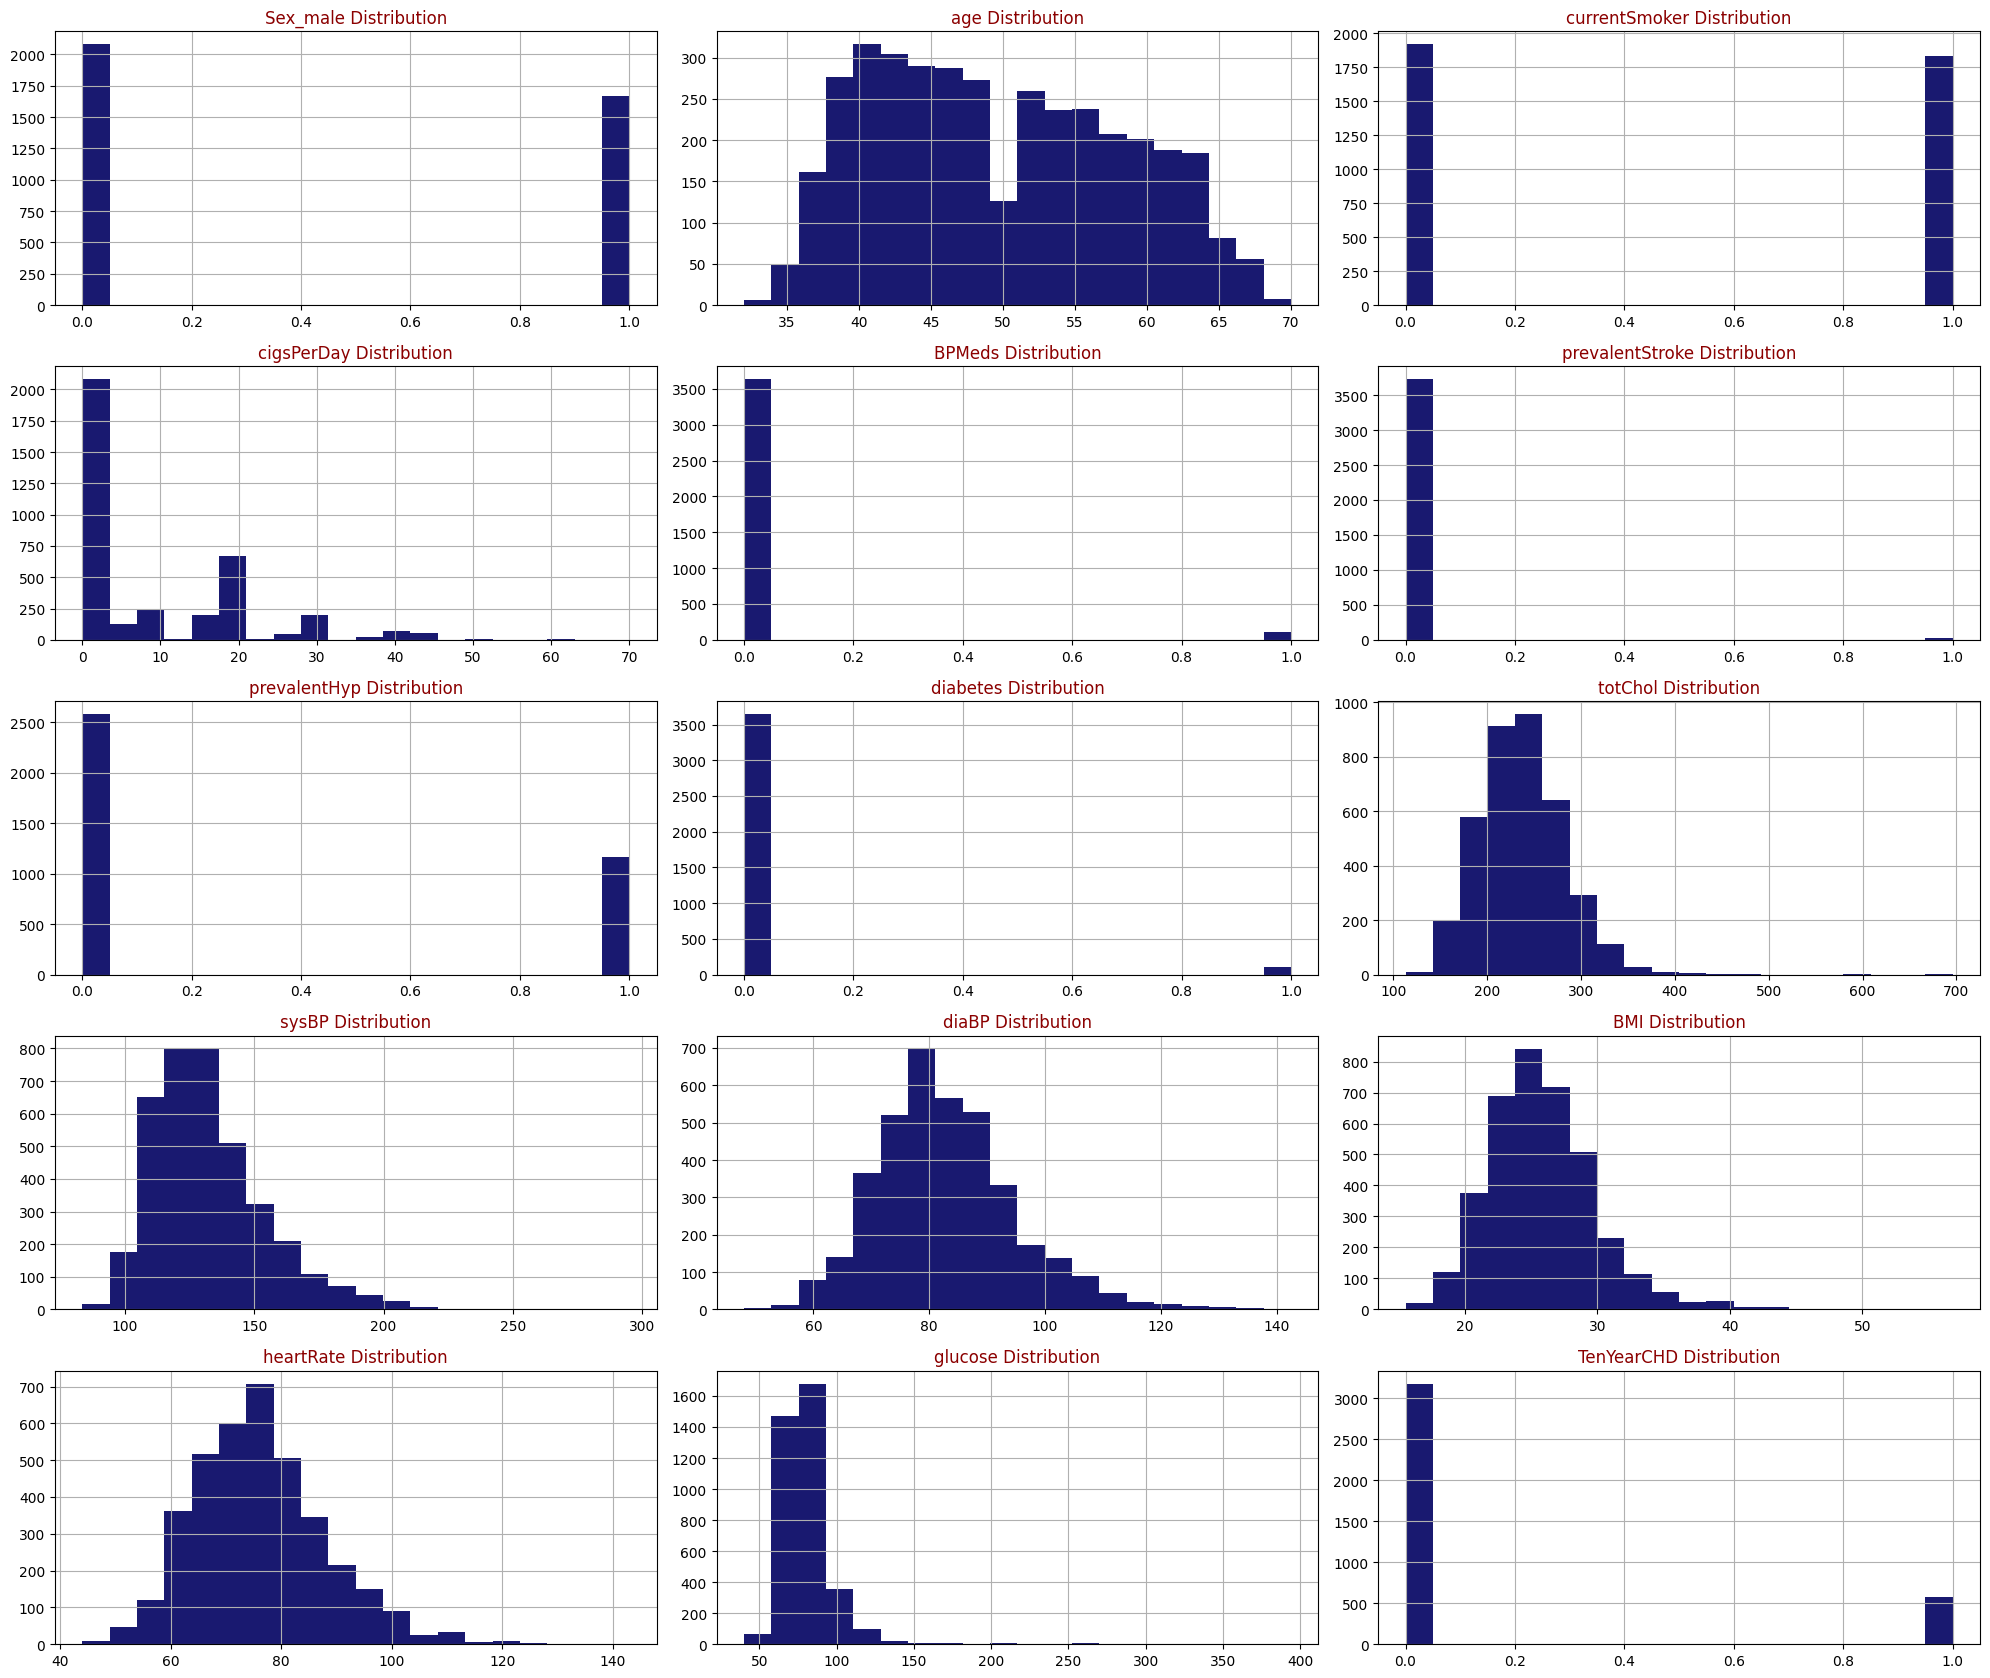

In [14]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [15]:
heart_df.TenYearCHD.value_counts()


0    3177
1     572
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

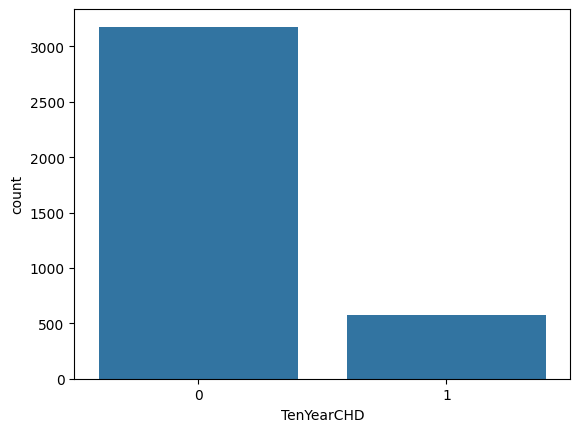

In [16]:
sn.countplot(x='TenYearCHD',data=heart_df)


In [17]:
heart_df.describe()


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Logistic Regression


In [18]:
heart_df.dtypes

Sex_male             int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [19]:
X = heart_df.drop(columns = 'TenYearCHD', axis=1)
Y = heart_df['TenYearCHD']

In [20]:
print(X)

      Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   
...        ...  ...            ...         ...     ...              ...   
4231         1   58              0         0.0     0.0                0   
4232         1   68              0         0.0     0.0                0   
4233         1   50              1         1.0     0.0                0   
4234         1   51              1        43.0     0.0                0   
4237         0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0                0

In [21]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(3749, 14) (2999, 14) (750, 14)


In [25]:
Y_train.value_counts()

0    2541
1     458
Name: TenYearCHD, dtype: int64

In [26]:
from sklearn import svm

In [27]:
classifier = svm.SVC()

In [28]:
classifier.fit(X_train, Y_train)

SVC()

In [29]:
from sklearn.metrics import accuracy_score

In [30]:

prediction = classifier.predict(X_test)
accuracy1 = accuracy_score(Y_test,prediction )

In [31]:
print('Accuracy score of the training data : ', accuracy1)

Accuracy score of the training data :  0.848


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log1 = LogisticRegression()
log1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred01 = log1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred01)
print(" Accuracy:", accuracy)

 Accuracy: 0.8466666666666667


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [37]:
from sklearn.svm import SVC

In [38]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
print(model1)
print(model2)
print(model3)

LogisticRegression()
DecisionTreeClassifier()
SVC(probability=True)


In [41]:
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='hard')

In [42]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))])

In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(Y_test, y_pred)
print("Max Voting Accuracy:", accuracy)

Max Voting Accuracy: 0.848


In [45]:
model1 = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft')

In [46]:
model1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [47]:
y_pred1 = model1.predict(X_test)

In [48]:
accuracy = accuracy_score(Y_test, y_pred1)
print("Averaging Accuracy:", accuracy)

Averaging Accuracy: 0.8453333333333334


In [49]:
weights = [0.6, 0.8, 0.9]

model2 = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft', weights=weights)

In [50]:
model2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              VotingClassifier(estimators=[('lr',
                                                            LogisticRegression()),
                                                           ('dt',
                                                            DecisionTreeClassifier()),
                                                           ('svc',
                                                            SVC(probability=True))],
                                               voting='soft')),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft', weights=[0.6, 0.8, 0.9])

In [51]:
y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred2)
print("Weighted Averaging Accuracy:", accuracy)

Weighted Averaging Accuracy: 0.7706666666666667


In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8293333333333334

In [53]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.8426666666666667

In [61]:
Sex_male = int(input('Enter the GENDER: '))
age = int(input('Enter the AGE: '))
currentSmoker = int(input('SMOKING: '))
cigsPerDay2 = int(input('cigsPerDay: '))
BPMeds = int(input('BPMeds: '))
prevalentStroke = float(input('prevalentStroke: '))
prevalentHyp = float(input('prevalentHyp: '))
diabetes = float(input('diabetes: '))
totChol = float(input('totChol: '))
sysBP	 = float(input('sysBP: '))
diaBP = int(input('diaBP: '))
BMI = int(input('BMI: '))
heartRate = int(input('heartRate: '))
glucose = int(input('glucose: '))

Enter the GENDER: 1
Enter the AGE: 44
SMOKING: 1
cigsPerDay: 2
BPMeds: 2
prevalentStroke: 2
prevalentHyp: 2
diabetes: 3
totChol: 55
sysBP: 5
diaBP: 6
BMI: 4
heartRate: 5
glucose: 5


In [59]:
heart_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [62]:
import pickle

In [63]:
filename = 'heart1.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [64]:
loaded_model = pickle.load(open('heart1.sav', 'rb'))